In [67]:
from pycesam import *
from pycesam.gui import *
import astropy.units as u
from astropy.constants import R_jup, R_sun, mu0, M_sun, G
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from ipywidgets import interact

In [68]:
mdl = CModel('2MJ')
mdl_plot = CModelGUI('2MJ')

Reading 2MJ.don...[Done]
Reading 2MJ.run...[Done]
Reading 2MJ.frun...[Done]
Reading 2MJ-nad.osch5...[Done]
Reading 2MJ.HRnew...[Done]
Reading 2MJ.don...[Done]
Reading 2MJ.run...[Done]
Reading 2MJ.frun...[Done]
Reading 2MJ-nad.osch5...[Done]
Reading 2MJ.HRnew...[Done]


/Users/paulvuattier/Desktop/cesam2k20/python3/pycesam/gui/__init__.py:808: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim( 0.0, ymax*1.05 )


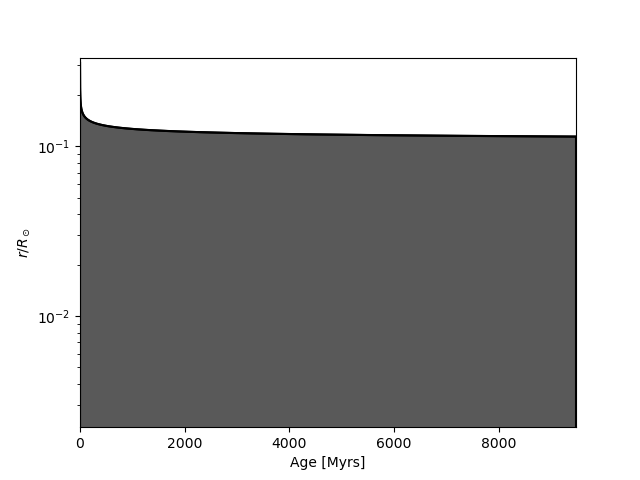

In [69]:
mdl_plot.plot_cz(r_or_m='r')
plt.show()

In [70]:
end = len(mdl.glob)-1
Omega = mdl.params.w_rot*1e3
R_tot = mdl.var[end][0][0]/1e2
print(f"total radius of planet = {R_tot/(R_jup.value)} Rjup")
print(f"total mass of planet = {mdl.params.mtot} Msun")
print(f"total angular velocity of planet = {Omega/1e3} km/s")

total radius of planet = 1.1132991499839993 Rjup
total mass of planet = 0.0019 Msun
total angular velocity of planet = 5.0 km/s


In [71]:
Omega_array = mdl.var[end][15] # rad/s

In [72]:
len(Omega_array)

447

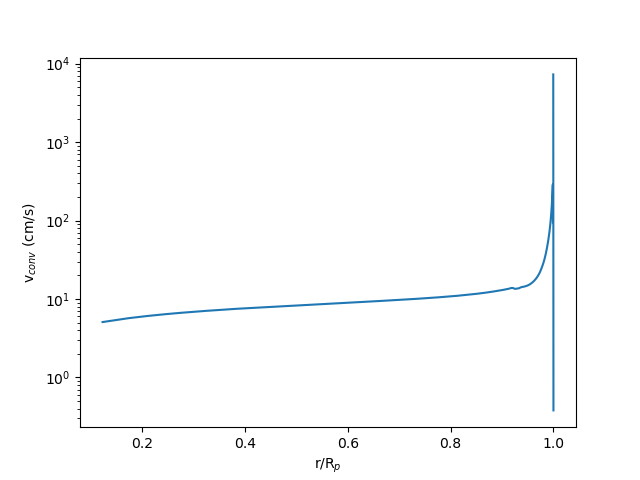

In [73]:
mdl.calc_vconv('osc', i=end)

r = ((mdl.var[end][0])/(R_tot*1e2))
  
plt.figure()
plt.plot(r, mdl.vconv)
    
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'v$_{conv}$ (cm/s)')
plt.yscale('log')
plt.show()

In [74]:
mask = np.where(~np.isnan(mdl.vconv))

In [75]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Ro_over_time(i=end):
    
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    mdl.calc_vconv('osc', i=i)
    Ro = mdl.vconv/(mdl.lmix*mdl.var[i][15]) #vconv/lmix * Omega
        
        
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Ro),len(mdl.vconv),len(mdl.lmix))
    plt.plot(r, Ro)
    plt.plot(r, 0.12*np.ones(len(Ro)), label=r'critical R$_o$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'Ro')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=226, description='i', max=226), Output()), _dom_classes=('widget-interac…

In [76]:
r[index]

array([0.84672373])

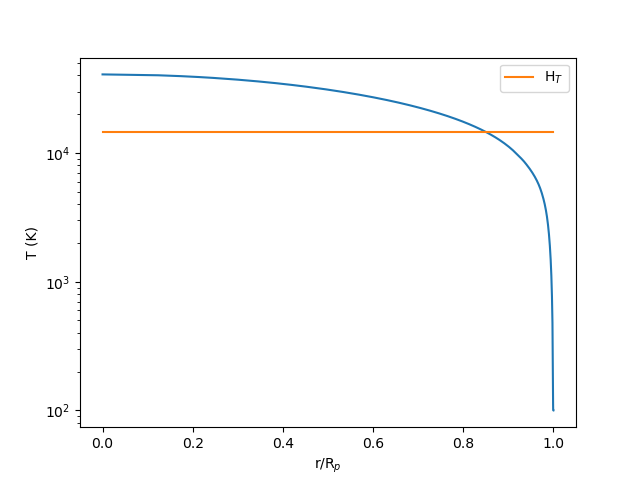

In [77]:
T = mdl.var[end][2]
index = np.where(np.abs(T - T[-1]/2.78) < 104)
plt.figure()
plt.plot(r, T)
plt.plot(r, (T[-1]/2.78)*np.ones(len(r)), label=r'H$_T$')
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'T (K)')
plt.yscale('log')
plt.legend()
plt.show()

H_T_obs = r[index]*R_tot*1e2

In [78]:
@interact(i=(0, len(mdl.var), 1)) 
def plot_pressure_over_time(i=end):
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    age = mdl.glob[i][10]
    plt.figure()
    plt.plot(r, mdl.var[i][3]*1e-12)
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'P (Mbar)')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=226, description='i', max=227), Output()), _dom_classes=('widget-interac…

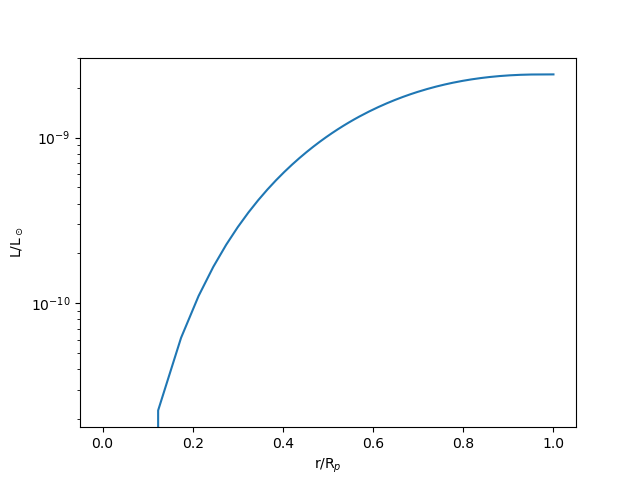

In [79]:
L = mdl.var[end][6]
L_sun = mdl.glob[end][16]

plt.figure()
plt.plot(r, L/L_sun)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'L/L$_\odot$')
plt.yscale('log')
plt.show()

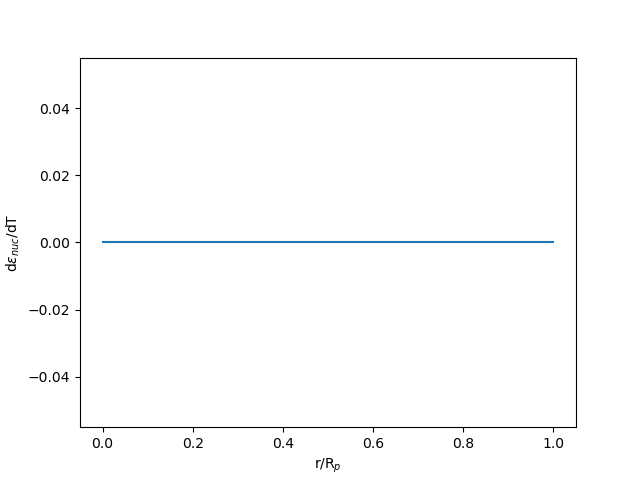

In [80]:
denuc_dT = mdl.var[end][18]

plt.figure()
plt.plot(r, denuc_dT)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'd$\epsilon_{nuc}$/dT')
#plt.yscale('log')
plt.show()

In [81]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Rm_over_time(i=end):

    c = 3*10**10
    eta = c**2/(4*np.pi*10**7*mdl.var[i][2]**(3/2)) #eta = c^2/(4*pi*10^7*T^3/2)
    mdl.calc_vconv('osc', i=i)
    Rm = mdl.vconv*mdl.lmix/eta
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    
    
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Rm),len(eta))
    plt.plot(r, Rm)
    plt.plot(r, 50*np.ones(len(Rm)), label=r'critical R$_m$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'R$_m$')
    plt.yscale('log')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=226, description='i', max=226), Output()), _dom_classes=('widget-interac…

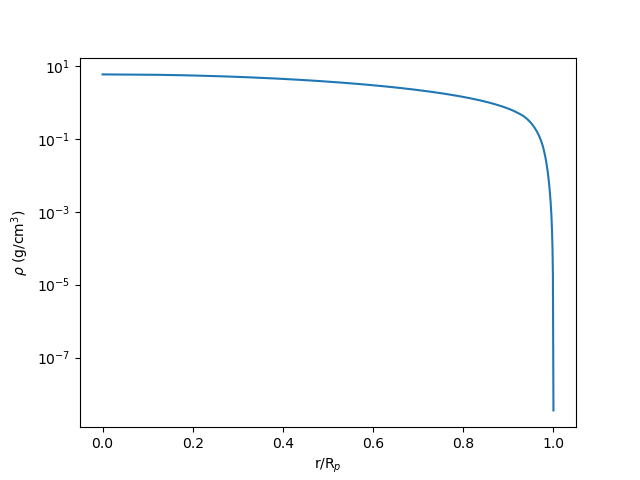

In [82]:
rho = mdl.var[end][4]

plt.figure()
plt.plot(r, rho)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.yscale('log')
plt.show()

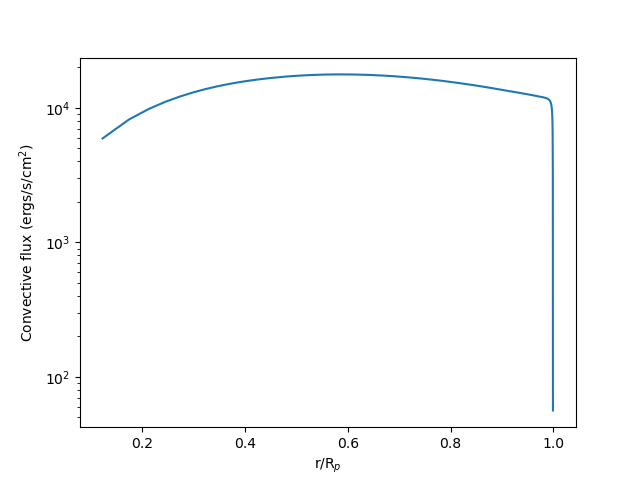

In [83]:
plt.figure()
plt.plot(r, mdl.Fconv)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Convective flux (ergs/s/cm$^2$)')
plt.yscale('log')
plt.show()

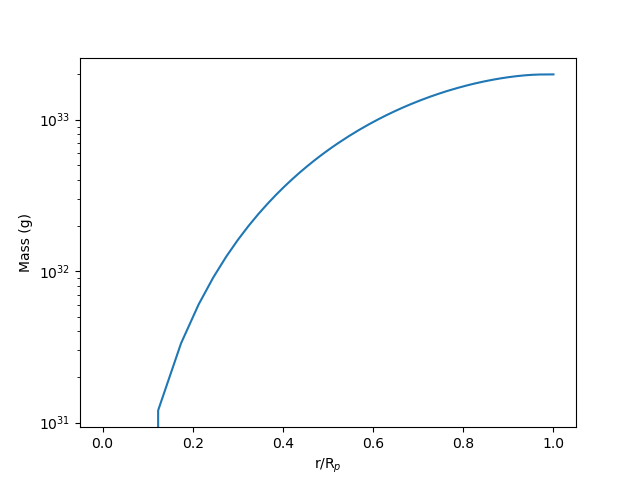

In [84]:
plt.figure()
plt.plot(r, mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

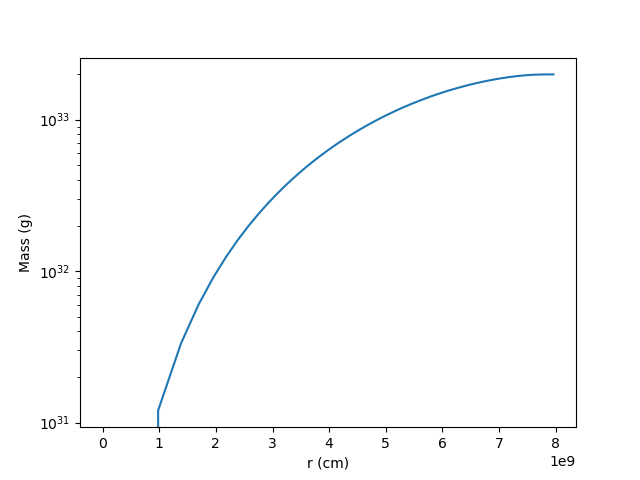

In [85]:
plt.figure()
plt.plot(mdl.var[end][0], mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r (cm)')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

In [86]:
print(np.shape(mdl.Fconv[mask][mask_2]),np.shape(mdl.lmix[mask][mask_2]),np.shape(rho[mask][mask_2]),np.shape(dr[mask_2]),np.shape(H_T_obs))

(400,) (400,) (400,) (400,) (1,)


In [87]:
c = 0.68
f_ohm = 1
rho_avg = np.mean(rho[mask])
qc_0 = mdl.Fconv[mask][-1]
P = mdl.var[end][3][mask]
dr = mdl.var[end][0][mask]
mask_2 = np.where(mdl.Fconv[mask] > 0)
V = (4/3)*np.pi*(R_tot*1e2)**3
dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
mask_3 = np.where(dF > 0)
#F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
F = np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V #trapz ou trapezoid dépend de la version de numpy
print(F)


1.1060003218861412


In [88]:
B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
print(f"Generated magnetic field strength = {B} Gauss")

Generated magnetic field strength = 14.10084440166904 Gauss


In [91]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Elsasser_over_time(i=end):

    T = mdl.var[i][2]
    sigma = 10**7*T**(3/2)
    rho = mdl.var[i][4]
    mdl.calc_vconv('osc', i=i)
    mask = np.where(~np.isnan(mdl.vconv))
    rho_avg = np.mean(rho[mask])
    qc_0 = mdl.Fconv[mask][-1]
    dr = mdl.var[i][0][mask]
    mask_2 = np.where(mdl.Fconv[mask] > 0)
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    index = np.where(np.abs(T - T[-1]/2.78) < 104)
    H_T_obs = (r[index]*R_tot)[0]
    print(H_T_obs)
    V = (4/3)*np.pi*(R_tot)**3
    dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
    mask_3 = np.where(dF > 0)
    #F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
    F = np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
    print(F)
    B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
    Omega = mdl.var[i][15]
    Elsasser = sigma*B**2/(rho*Omega)
    
    print(f"Generated magnetic field strength = {B} Gauss")
    plt.figure()
    plt.plot(r, Elsasser)
    plt.plot(r, 1*np.ones(len(Elsasser)), label=r'critical Elsasser')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'Elsasser nb')
    plt.yscale('log')
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=226, description='i', max=226), Output()), _dom_classes=('widget-interac…